# 알파카 고수

# <span style="color:red">알</span><span style="color:orange">파</span><span style="color:gold">카</span><span style="color:pink"> 초</span><span style="color:green">고</span><span style="color:blue">수</span>


In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt # 그래프 출력시
import matplotlib as mpl #그래프 옵션
import warnings
warnings.filterwarnings('ignore')
# 그래프 시각화 옵션
%matplotlib inline

#그래프 한글설정
mpl.rc('font', family = 'NanumBarunGothic')
#선명
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값이 나올때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

import seaborn as sns

In [2]:
data_raw1 = pd.read_csv('./datas/train/2016_health_checkup_1.csv')
data_raw2 = pd.read_csv('./datas/train/2016_health_checkup_2.csv')
data_raw3 = pd.read_csv('./datas/train/2016_health_checkup_3.csv')
data_raw4 = pd.read_csv('./datas/train/2016_health_checkup_4.csv')
data = data_raw1.append(data_raw2).append(data_raw3).append(data_raw4)
data = data.reset_index(drop=True)

0
0


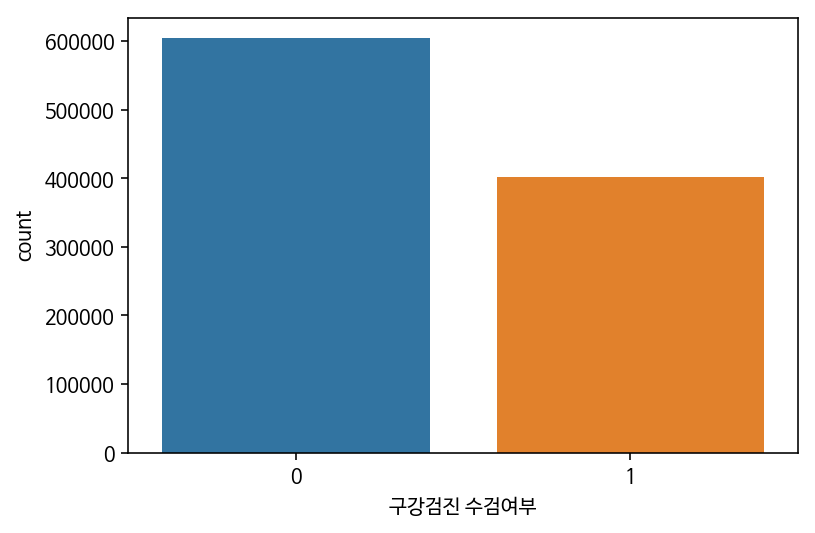

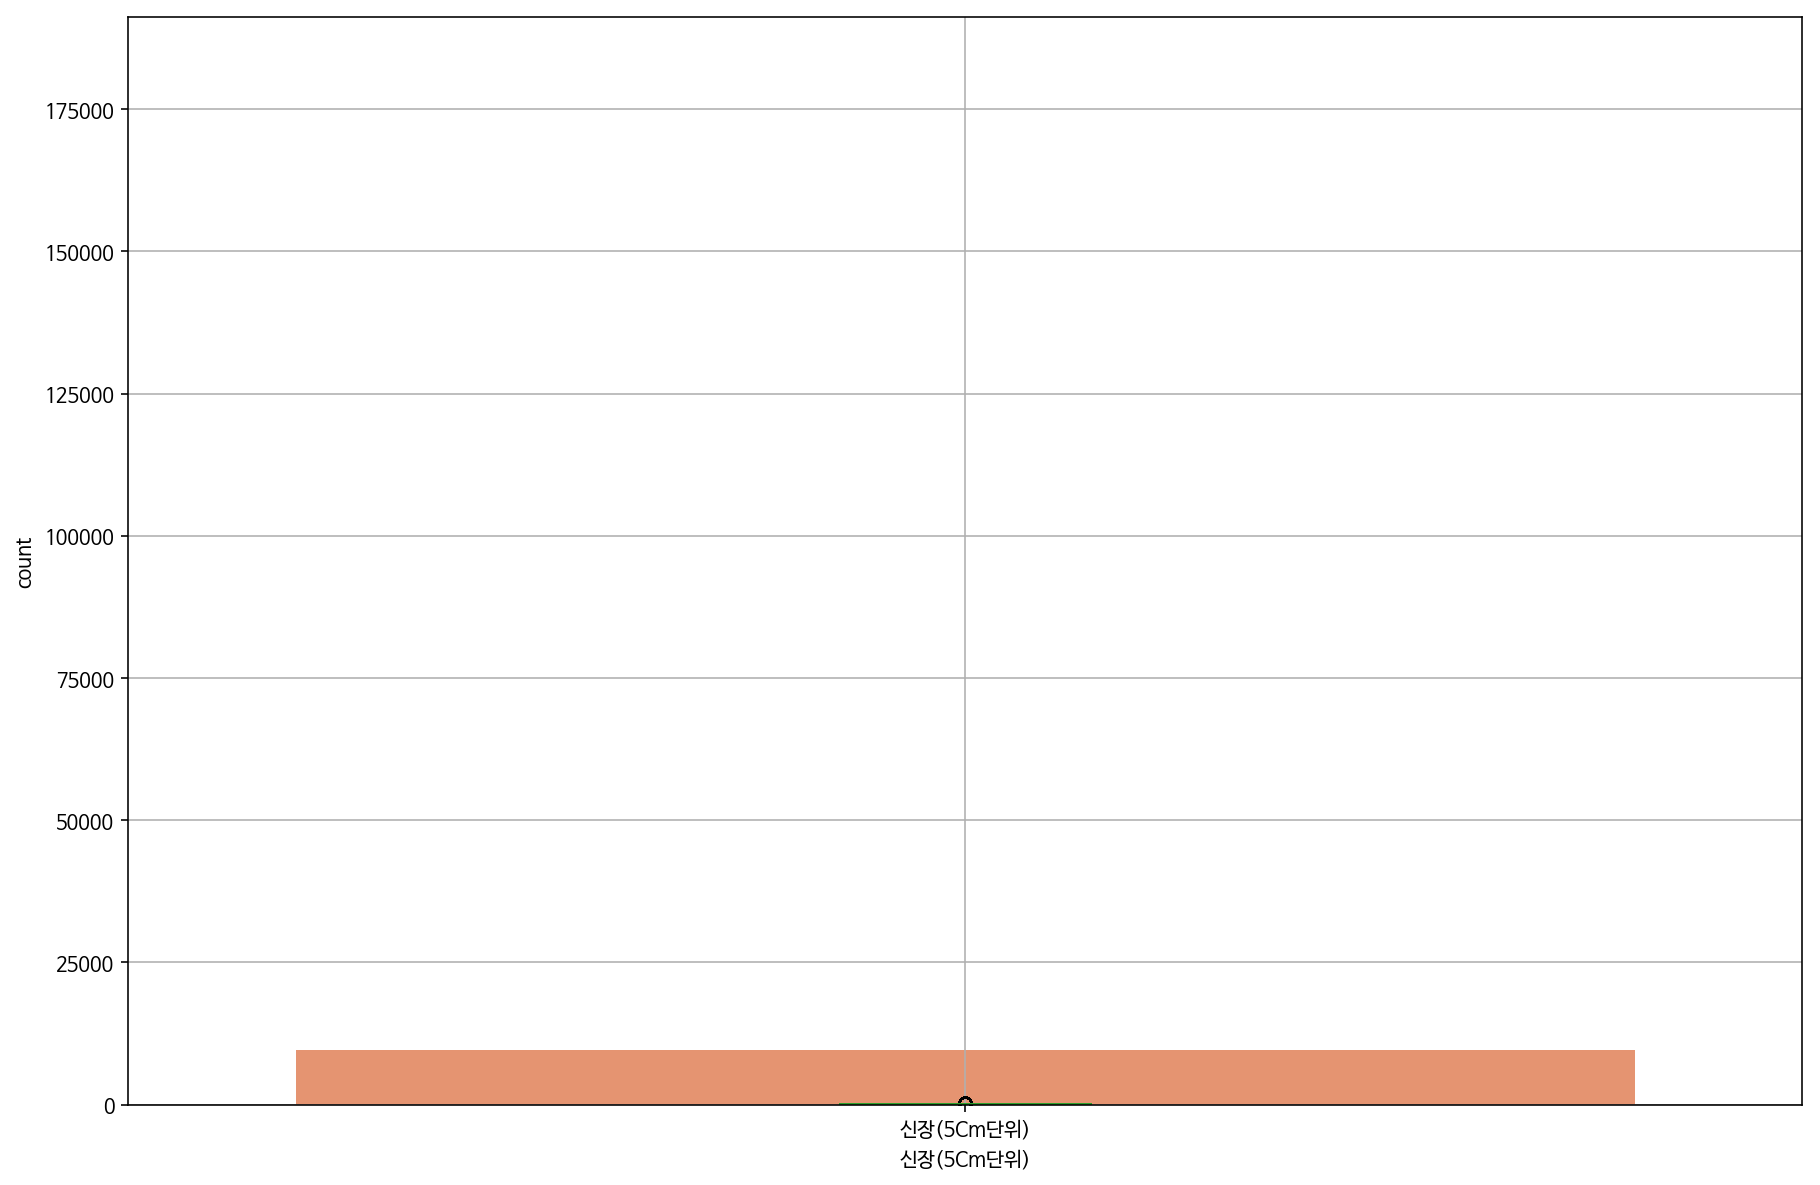

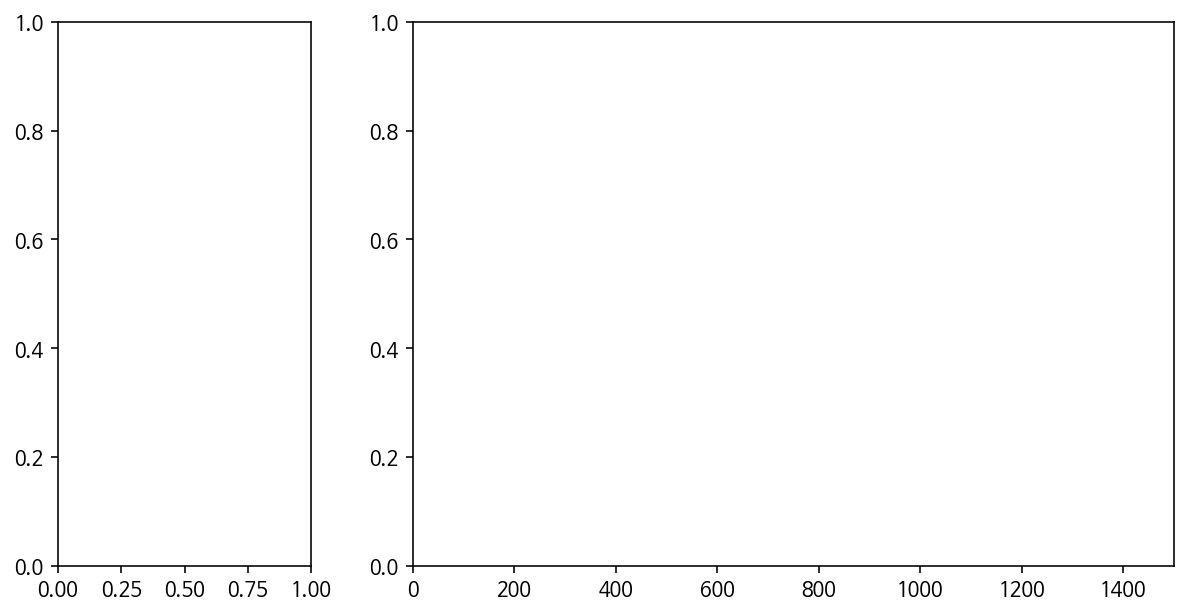

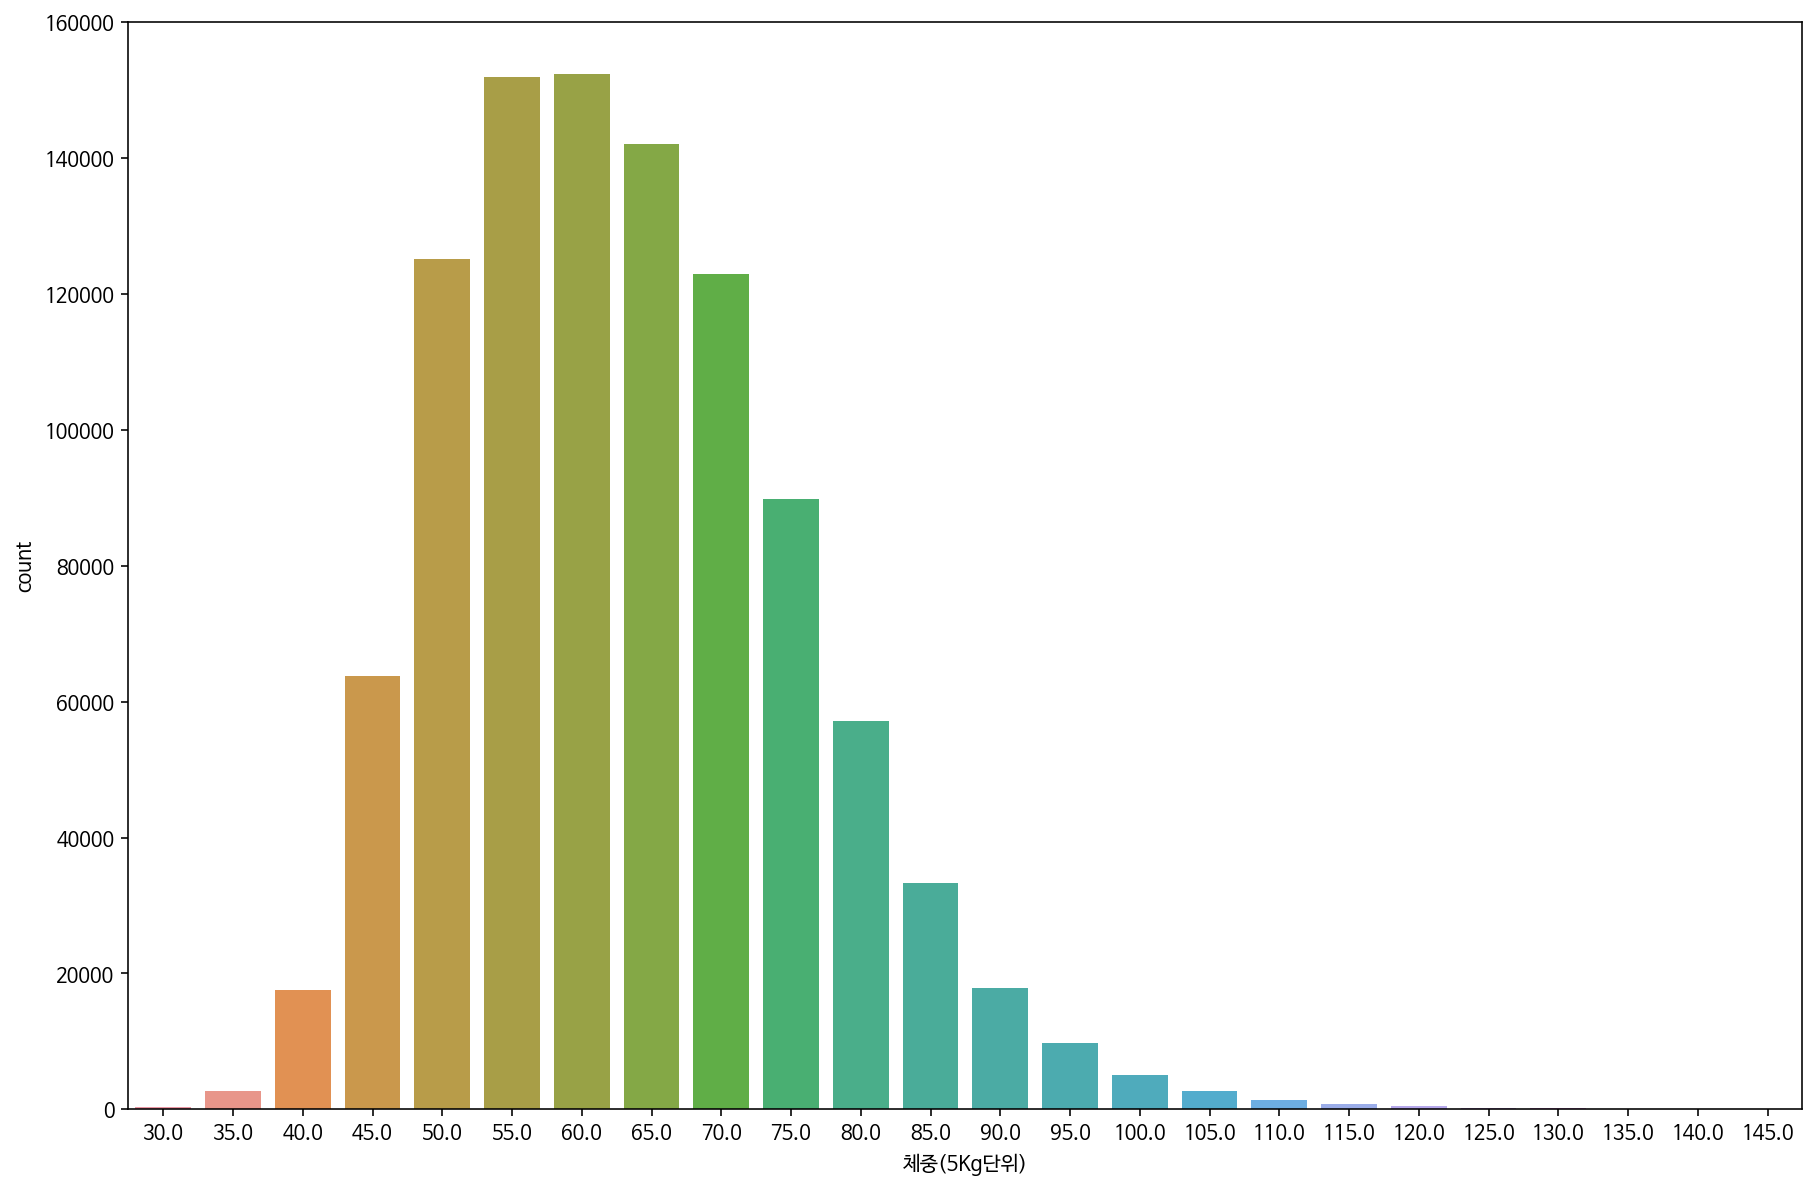

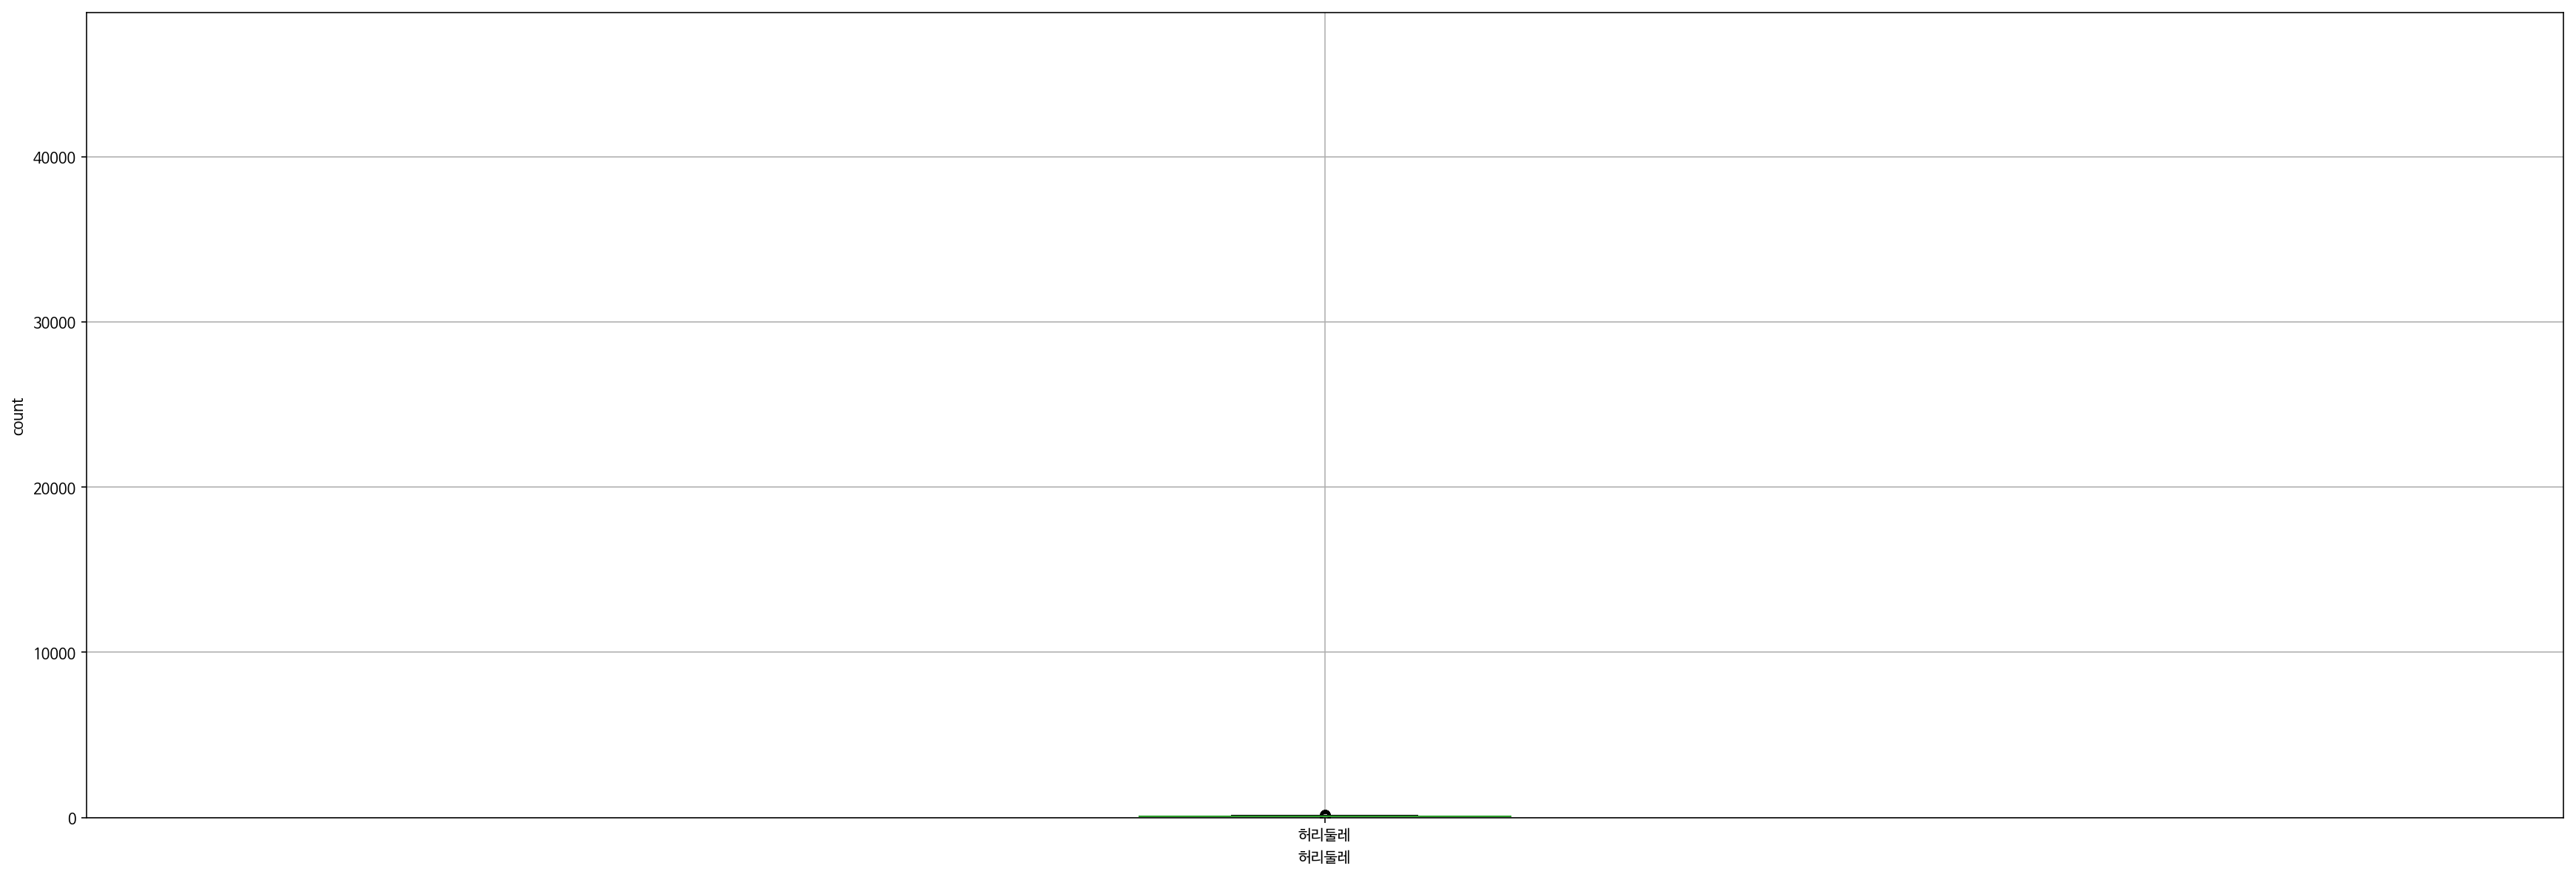

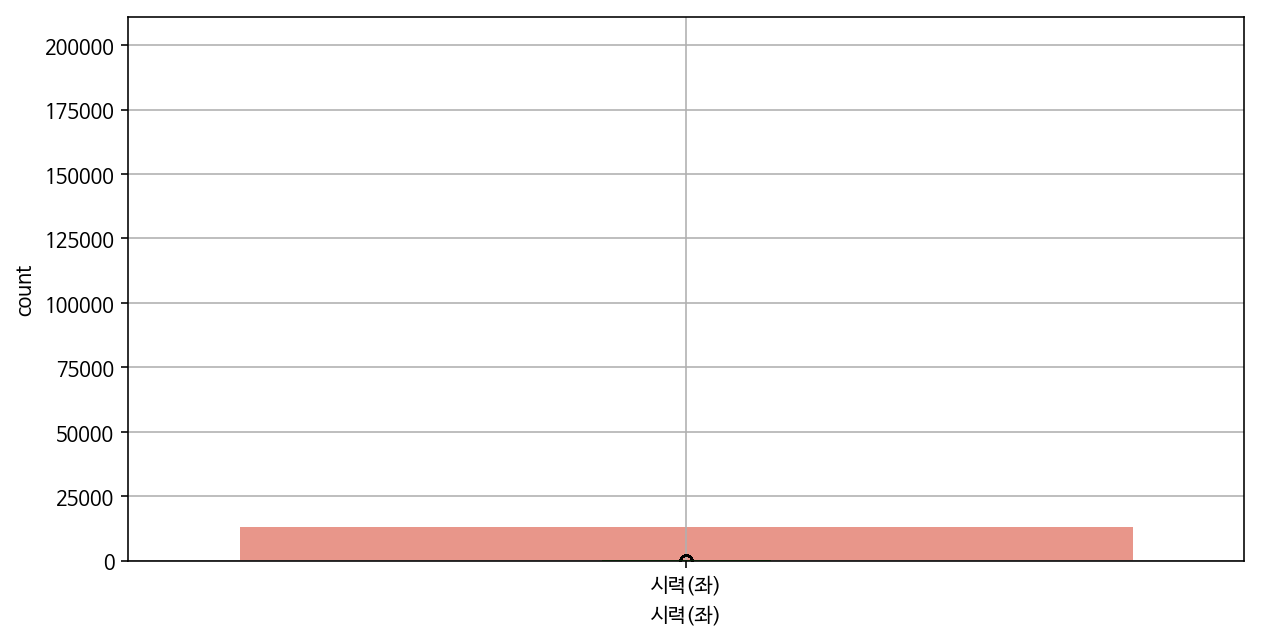

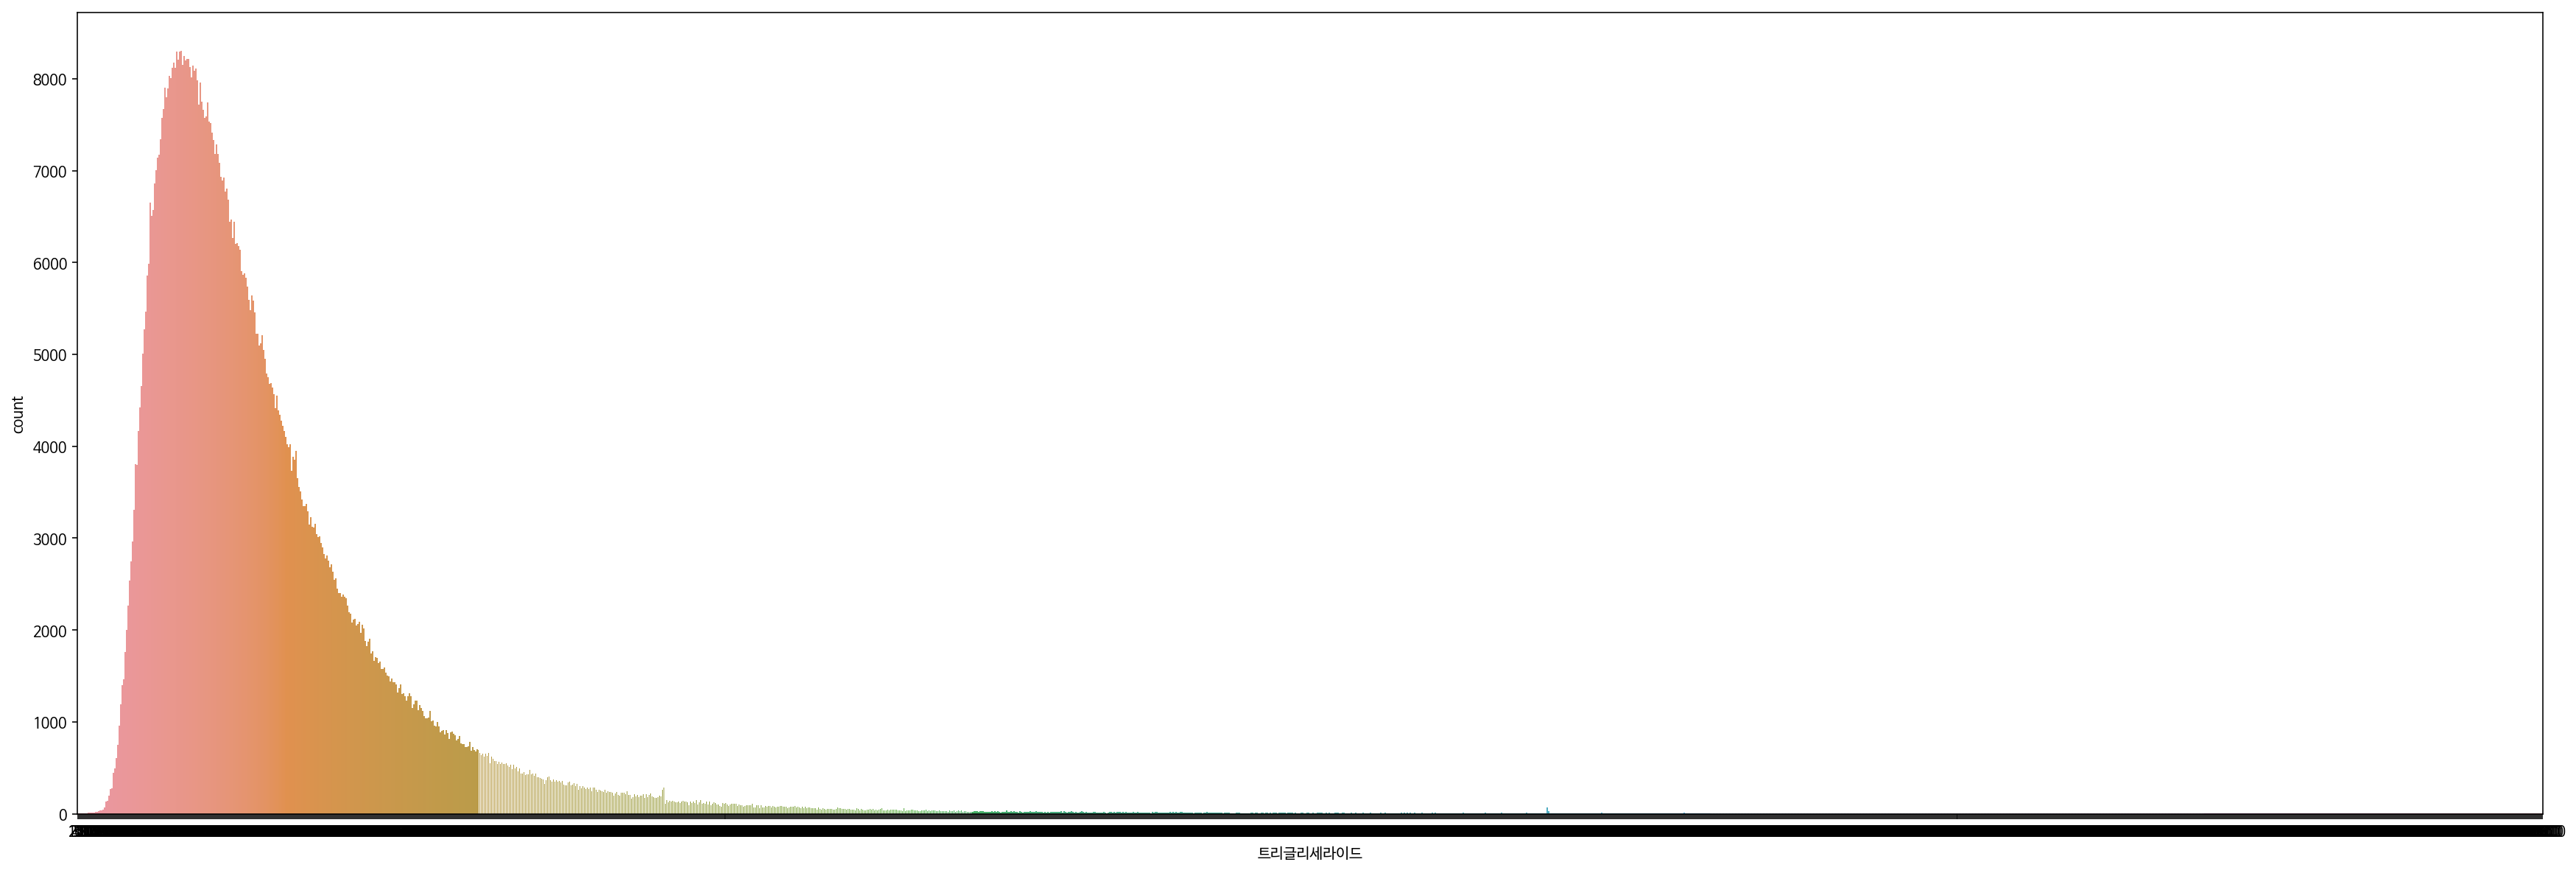

In [16]:
data['연령대코드(5세단위)'].describe()

sns.countplot(data['연령대코드(5세단위)'])

sns.countplot(data['시도코드'])

data.sort_index(by = '가입자일련번호')

sns.countplot(data['흡연상태'])

data.isnull().sum()

sns.countplot(data['구강검진 수검여부'])

# 신장(5Cm단위) <span style="color:red">이상치</span>와 <span style="color:green">결측치</span>

plt.figure(figsize=(15,10))
sns.countplot(data['신장(5Cm단위)']);

data['신장(5Cm단위)'].describe()

data[['신장(5Cm단위)']].boxplot(figsize = (5,20))

data[data['신장(5Cm단위)'] > 300].sort_index(by = '신장(5Cm단위)')

data[data['신장(5Cm단위)'] <= 130].sort_index(by = '신장(5Cm단위)')

data[(data['신장(5Cm단위)'].isnull()) &  (data['체중(5Kg단위)'].isnull())]

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[1,3]})
figure.set_size_inches(10,5)
ax1.set_ylim(0, 1)
ax2.set_xlim(0, 1500)

# sns.countplot(table1['product'], ax= ax1)
# sns.distplot(table1['amount'], ax= ax2)

# 체중(5Kg단위) <span style="color:red">이상치</span>와 <span style="color:green">결측치</span>

plt.figure(figsize=(15,10))
sns.countplot(data['체중(5Kg단위)']);

data["체중(5Kg단위)"].describe()

print(data[data['체중(5Kg단위)'] <= 25].sort_index(by = '체중(5Kg단위)').shape[0])
data[data['체중(5Kg단위)'] <= 25].sort_index(by = '체중(5Kg단위)')

print(data[data['체중(5Kg단위)'] >= 150].sort_index(by = '체중(5Kg단위)').shape[0])
data[data['체중(5Kg단위)'] >= 150].sort_index(by = '체중(5Kg단위)')

# 허리둘레 <span style="color:red">이상치</span>와 <span style="color:green">결측치</span>

plt.figure(figsize=(30,10))
sns.countplot(data['허리둘레'])

data["허리둘레"].describe()

data[['허리둘레']].boxplot(figsize = (10,10))

data[data['허리둘레'] <= 30].sort_index(by = '허리둘레')

data[data['허리둘레'] >= 200].sort_index(by = '허리둘레')

data[(data['허리둘레'].isnull())]

# 시력데이터 <span style="color:red">이상치</span>와 <span style="color:green">결측치</span>

plt.figure(figsize=(10,5))
sns.countplot(data['시력(좌)'])

data[['시력(좌)']].boxplot(figsize = (10,10))

data["시력(좌)"].describe()

data["시력(우)"].describe()

data[(data["시력(우)"] >= 9) & (data["시력(좌)"] < 9 )]

data[(data["시력(좌)"] >= 9) & (data["시력(우)"] < 9 )]

data[(data['시력(좌)'].isnull()) & (data['시력(우)'].isnull())]

# 트리글리세라이드 <span style="color:red">이상치</span>와 <span style="color:green">결측치</span>

data["트리글리세라이드"].describe()

plt.figure(figsize=(30,10))
sns.countplot(data['트리글리세라이드'])

<br><font size=20>DAY4 <span style="color:red">이</span><span style="color:orange">상</span><span style="color:gold">치</span><span style="color:pink"> 처</span><span style="color:green">리</span></font>





# 신장(5Cm단위)와 체중(5Kg단위) 결측치 처리

In [17]:
# 일단 신장과 체중 둘다 결측치인 경우 데이터를 제거한다. 

print("결측치 처리 전:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

tmp1 = data['신장(5Cm단위)'].isnull()
tmp2 = data['체중(5Kg단위)'].isnull()

data = data[~(tmp1 & tmp2)]

print("1차 결측치 처리 후:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

# 남은 결측치를 평균으로 채운다.

hmean = round(data['신장(5Cm단위)'].mean(), -1)
smean = round(data['체중(5Kg단위)'].mean(), -1)

data['신장(5Cm단위)'] = data['신장(5Cm단위)'].replace(np.nan,hmean)
data['체중(5Kg단위)'] = data['체중(5Kg단위)'].replace(np.nan,smean)

print("2차 결측치 처리 후:")
print(data[['신장(5Cm단위)','체중(5Kg단위)']].isnull().sum())

결측치 처리 전:
신장(5Cm단위)    0
체중(5Kg단위)    0
dtype: int64
1차 결측치 처리 후:
신장(5Cm단위)    0
체중(5Kg단위)    0
dtype: int64
2차 결측치 처리 후:
신장(5Cm단위)    0
체중(5Kg단위)    0
dtype: int64


In [18]:
df = [["신장,체중 결측치 제거후",len(data)]]

# 신장(5Cm단위) 이상치 처리

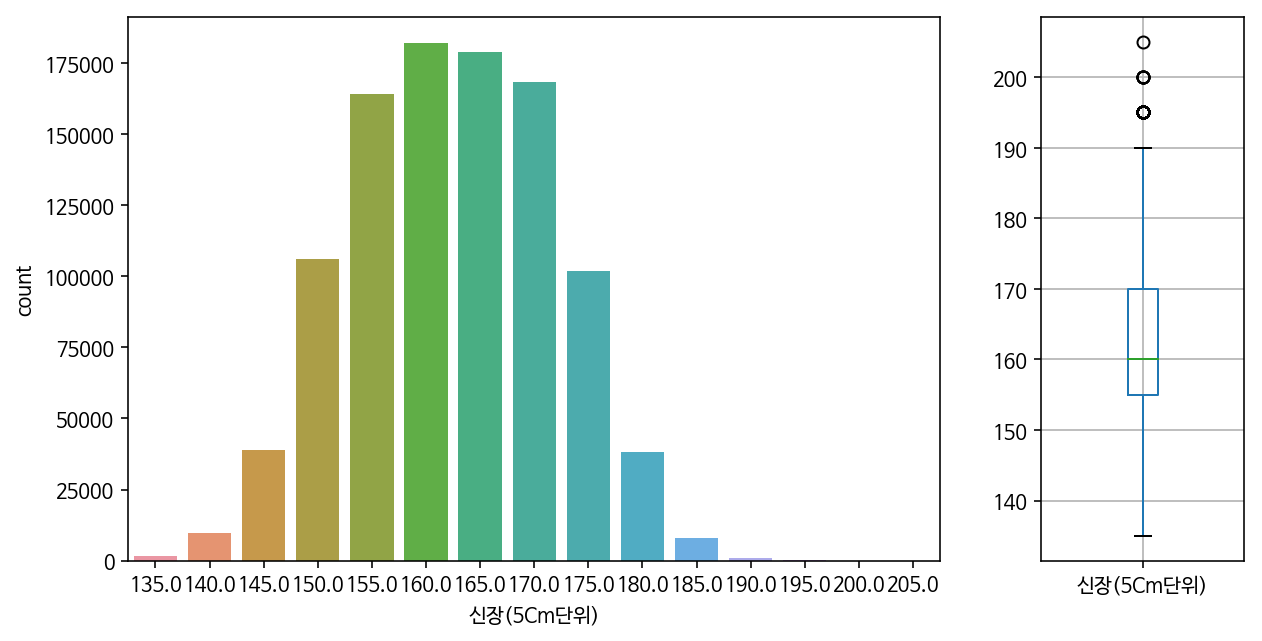

In [19]:
# 신장 130cm 이하 키 모두 제거 1900cm 키 190cm로 변경

data = data[(data['신장(5Cm단위)'] > 130)]
data['신장(5Cm단위)'] = data['신장(5Cm단위)'].replace(1900,190)

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(10,5)

sns.countplot(data['신장(5Cm단위)'], ax=ax1);
data[['신장(5Cm단위)']].boxplot(ax = ax2);

In [20]:
df.append(["신장 이상치 제거후",len(data)])

# 체중(5Kg단위) 이상치 처리

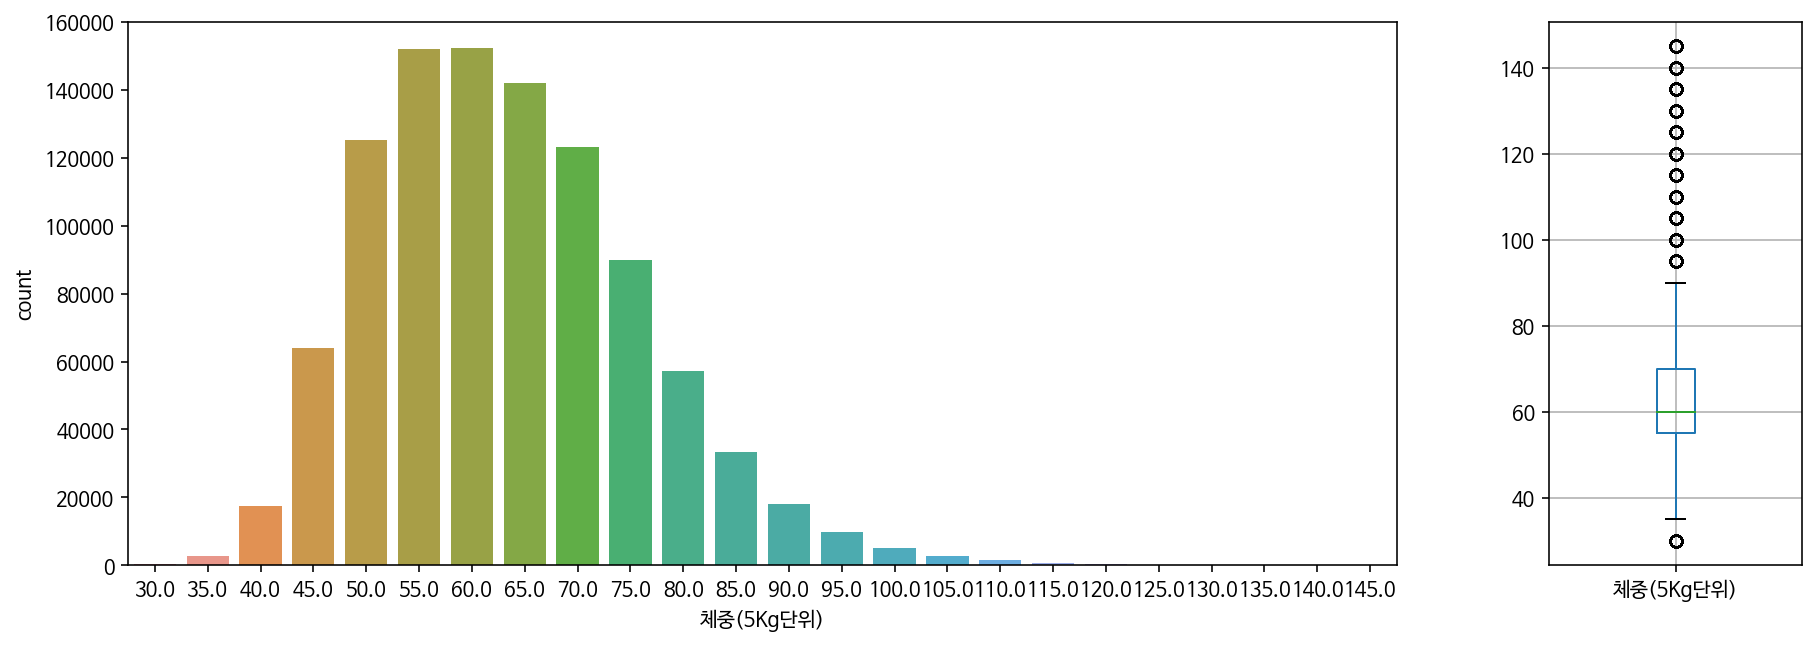

In [21]:
# 체중이 25kg이하 150kg 이상인 데이터를 제거한다. 
data = data[(data['체중(5Kg단위)'] < 150) & (data['체중(5Kg단위)'] > 25)]
                                         
figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[5,1]})
figure.set_size_inches(15,5)

sns.countplot(data['체중(5Kg단위)'], ax=ax1);
data[['체중(5Kg단위)']].boxplot(ax = ax2);

In [22]:
df.append(["체중 이상치 제거후",len(data)])

# 허리둘레 결측치 처리

In [23]:
#허리둘레의 결측치 제거한다.

print("결측치 처리 전:")
print(data['허리둘레'].isnull().sum())

data = data[~(data['허리둘레'].isnull())]

print("결측치 처리 후:")
print(data['허리둘레'].isnull().sum())

결측치 처리 전:
0
결측치 처리 후:
0


In [24]:
df.append(["허리둘레 결측치 제거후",len(data)])

# 허리둘레 이상치 제거

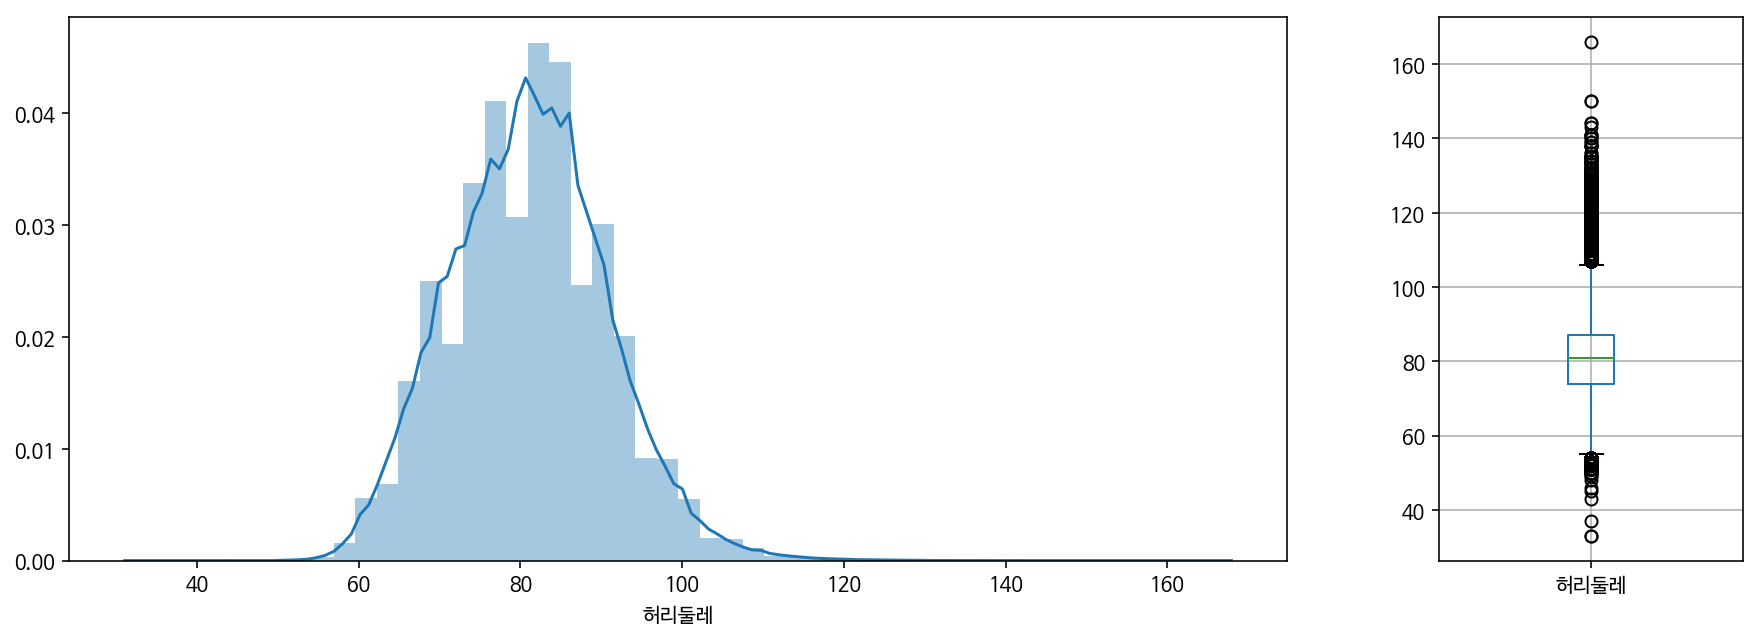

In [25]:
# 허리둘레는 30이하는 이상치라 판단하여 제거
# 허리둘레는 999는 말이 안되므로 제거

tmp3 = data['허리둘레'] <= 30
tmp4 = data['허리둘레'] == 999

data = data[~(tmp3 | tmp4)]

figure, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, gridspec_kw = {'width_ratios':[4,1]})
figure.set_size_inches(15,5)

sns.distplot(data['허리둘레'], ax=ax1);
data[['허리둘레']].boxplot(ax = ax2);

In [26]:
df.append(["허리둘레 이상치 제거후",len(data)])

# 시력(좌), 시력(우) 결측치 제거

In [27]:
#시력이 좌우 둘다 결측치인 경우 제거한다.

print("결측치 처리 전:")
print(data[['시력(좌)','시력(우)']].isnull().sum())

tmp5 = data['시력(좌)'].isnull()
tmp6 = data['시력(우)'].isnull()

data = data[~(tmp5 & tmp6)]

print("1차 결측치 처리 후:")
print(data[['시력(좌)','시력(우)']].isnull().sum())
data = data.reset_index(drop=True)

결측치 처리 전:
시력(좌)    16
시력(우)    15
dtype: int64
1차 결측치 처리 후:
시력(좌)    16
시력(우)    15
dtype: int64


In [28]:
#반대 시력으로 결측치를 채운다.
data.loc[tmp5, '시력(좌)'] = data['시력(우)']
data.loc[tmp6, '시력(우)'] = data['시력(좌)']

print("2차 결측치 처리 후:")
print(data[['시력(좌)','시력(우)']].isnull().sum())  

2차 결측치 처리 후:
시력(좌)    0
시력(우)    0
dtype: int64


In [29]:
df.append(["시력 결측치 제거후",len(data)])

# 시력(좌), 시력(우) 이상치 제거

In [34]:
# tmp7 = data["시력(좌)"] >= 9
# tmp8 = data["시력(우)"] >= 9


data['시력(좌)'] = data['시력(좌)'].map(lambda x : 0 if x > 9 else x)
data['시력(우)'] = data['시력(우)'].map(lambda x : 0 if x > 9 else x)

data['시력(좌)'] = data['시력(좌)'].map(lambda x : 0 if x > 0.1 else 1)
data['시력(우)'] = data['시력(우)'].map(lambda x : 0 if x > 0.1 else 1)
# data[] = data[~(tmp7 & tmp8)]

# # 한쪽만 9이상 이면 반대쪽으로 맞춤
# data.loc[tmp7, '시력(좌)'] = data['시력(우)']
# data.loc[tmp8, '시력(우)'] = data['시력(좌)']



In [35]:
df.append(["시력 이상치 제거후",len(data)])

# 수축기혈압, 이완기혈압 결측치 제거

In [51]:
#data를 결측 여부에 있어 나눔

data_nan_relax_o = data[np.isnan(data['이완기혈압'])]     # 89
data_nan_relax_x = data[~np.isnan(data['이완기혈압'])]    # 999911
data_nan_contract_o = data[np.isnan(data['수축기혈압'])]  # 88
data_nan_contract_x = data[~np.isnan(data['수축기혈압'])] # 999912

normal = (data['수축기혈압'] < 120) & (data['이완기혈압'] < 80)

mean_contract = round(data[normal]['수축기혈압'].mean(), 0)
print("수축기혈압 평균 :",mean_contract)
mean_relax = round(data[normal]['이완기혈압'].mean(), 0)
print("이완기혈압 평균 :",mean_relax)

t = data_nan_contract_o
# t = t.drop([84005])
list_r = list(t.index)

data.drop(list_r,axis=0)

data['수축기혈압'] = data['수축기혈압'].replace(np.nan, mean_contract)
data['이완기혈압'] = data['이완기혈압'].replace(np.nan, mean_relax)

수축기혈압 평균 : 109.0
이완기혈압 평균 : 68.0


In [52]:
df.append(["수축기,이완기 결측치 제거후",len(data)])

,0,1
0,"신장,체중 결측치 제거후",998172.0
1,신장 이상치 제거후,998172.0
2,체중 이상치 제거후,998172.0
3,허리둘레 결측치 제거후,998172.0
4,허리둘레 이상치 제거후,998172.0
5,시력 결측치 제거후,998172.0
6,시력 이상치 제거후,998172.0
7,혈색소 결측치 제거후,998110.0
8,요단백 결측치 제거후,998110.0
9,콜레스테롤 결측치 제거후,926061.0


# 혈색소 결측치, 이상치 제거 

In [53]:
#혈색소 결측치 제거
data.dropna(subset=['혈색소'],how='all',inplace=True)
#혈색소 이상치 제거
data=data[data['혈색소']>3] 

In [54]:
df.append(["혈색소 결측치 제거후",len(data)])

,0,1
0,"신장,체중 결측치 제거후",998172.0
1,신장 이상치 제거후,998172.0
2,체중 이상치 제거후,998172.0
3,허리둘레 결측치 제거후,998172.0
4,허리둘레 이상치 제거후,998172.0
5,시력 결측치 제거후,998172.0
6,시력 이상치 제거후,998172.0
7,혈색소 결측치 제거후,998110.0
8,요단백 결측치 제거후,998110.0
9,콜레스테롤 결측치 제거후,926061.0


# 요단백 결측치 처리

In [55]:
#요단백 결측치 처리
#최빈값인 1로 대체
data["요단백"].fillna(1,inplace=True)

#요단백 이상치 처리 없음

In [56]:
df.append(["요단백 결측치 제거후",len(data)])

,0,1
0,"신장,체중 결측치 제거후",998172.0
1,신장 이상치 제거후,998172.0
2,체중 이상치 제거후,998172.0
3,허리둘레 결측치 제거후,998172.0
4,허리둘레 이상치 제거후,998172.0
5,시력 결측치 제거후,998172.0
6,시력 이상치 제거후,998172.0
7,혈색소 결측치 제거후,998110.0
8,요단백 결측치 제거후,998110.0
9,콜레스테롤 결측치 제거후,926061.0


# 총콜레스테롤, HDL콜레스테롤, LDL콜레스테롤, 트리글리세라이드


In [57]:
# 결측치 처리 (공식이용하여 수치 대체)
data.loc[(data['총콜레스테롤'].isnull() ==True),'총콜레스테롤'] = (data["HDL콜레스테롤"]+data["LDL콜레스테롤"]+data["트리글리세라이드"]/5)
data.loc[(data['HDL콜레스테롤'].isnull() ==True),'HDL콜레스테롤'] = (data["총콜레스테롤"]-data["LDL콜레스테롤"]-data["트리글리세라이드"]/5)
data.loc[(data['LDL콜레스테롤'].isnull() ==True),'LDL콜레스테롤'] = (data["총콜레스테롤"]-data["HDL콜레스테롤"]-data["트리글리세라이드"]/5)
data.loc[(data['트리글리세라이드'].isnull() ==True),'트리글리세라이드'] = ((data["총콜레스테롤"]-data["HDL콜레스테롤"]-data["LDL콜레스테롤"])*5)

# 4개 변수중 2개 이상이 결측인 경우 데이터 제거
data = data.dropna(subset=['총콜레스테롤'], how='all')
data = data.dropna(subset=['HDL콜레스테롤'], how='all')
data = data.dropna(subset=['LDL콜레스테롤'], how='all')
data = data.dropna(subset=['트리글리세라이드'], how='all')

# 이상치 처리
data = data[data['총콜레스테롤'] < 297]
data = data[data['HDL콜레스테롤'] < 98]
data = data[data['LDL콜레스테롤'] < 205]
data = data[data['트리글리세라이드'] < 298]

In [58]:
df.append(["콜레스테롤 결측치 제거후",len(data)])

,0,1
0,"신장,체중 결측치 제거후",998172.0
1,신장 이상치 제거후,998172.0
2,체중 이상치 제거후,998172.0
3,허리둘레 결측치 제거후,998172.0
4,허리둘레 이상치 제거후,998172.0
5,시력 결측치 제거후,998172.0
6,시력 이상치 제거후,998172.0
7,혈색소 결측치 제거후,998110.0
8,요단백 결측치 제거후,998110.0
9,콜레스테롤 결측치 제거후,926061.0


# 혈청크레아틴, AST, ALT 결측치 제거

In [59]:
# 혈청 삼형제 NaN값 제거 
data = data.dropna(subset=['혈청크레아티닌'], how='all')
data = data.dropna(subset=['(혈청지오티)AST'], how='all')
data = data.dropna(subset=['(혈청지오티)ALT'], how='all')

In [60]:
df.append(["혈청3 결측치 제거후",len(data)])

,0,1
0,"신장,체중 결측치 제거후",998172.0
1,신장 이상치 제거후,998172.0
2,체중 이상치 제거후,998172.0
3,허리둘레 결측치 제거후,998172.0
4,허리둘레 이상치 제거후,998172.0
5,시력 결측치 제거후,998172.0
6,시력 이상치 제거후,998172.0
7,혈색소 결측치 제거후,998110.0
8,요단백 결측치 제거후,998110.0
9,콜레스테롤 결측치 제거후,926061.0


# 식전혈당(공복혈당), 감마지티피, 치석

In [62]:
cols_to_handle = ['식전혈당(공복혈당)','감마지티피']
data = data.dropna(subset=cols_to_handle,how='any')
# data = data.drop('치석', axis=1)

In [63]:
df.append(["식전혈당,감마,치석 결측치 제거후",len(data)])

,0,1
0,"신장,체중 결측치 제거후",998172.0
1,신장 이상치 제거후,998172.0
2,체중 이상치 제거후,998172.0
3,허리둘레 결측치 제거후,998172.0
4,허리둘레 이상치 제거후,998172.0
5,시력 결측치 제거후,998172.0
6,시력 이상치 제거후,998172.0
7,혈색소 결측치 제거후,998110.0
8,요단백 결측치 제거후,998110.0
9,콜레스테롤 결측치 제거후,926061.0


In [64]:
data.isnull().sum()

가입자일련번호          0
성별코드             0
연령대코드(5세단위)      0
시도코드             0
신장(5Cm단위)        0
체중(5Kg단위)        0
허리둘레             0
시력(좌)            0
시력(우)            0
청력(좌)           97
청력(우)           97
수축기혈압            0
이완기혈압            0
식전혈당(공복혈당)       0
총콜레스테롤           0
트리글리세라이드         0
HDL콜레스테롤         0
LDL콜레스테롤         0
혈색소              0
요단백              0
혈청크레아티닌          0
(혈청지오티)AST       0
(혈청지오티)ALT       0
감마지티피            0
흡연상태           205
구강검진 수검여부        0
당뇨병 의사 판정        0
고혈압 의사 판정       20
간기능 이상여부         0
알콜성간염여부          0
dtype: int64

In [67]:
data = data.dropna(subset=['청력(좌)','청력(우)','흡연상태'],how='any' )

In [68]:
df = pd.DataFrame(df)
df

,0,1
0,"신장,체중 결측치 제거후",998172
1,신장 이상치 제거후,998172
2,체중 이상치 제거후,998172
3,허리둘레 결측치 제거후,998172
4,허리둘레 이상치 제거후,998172
5,시력 결측치 제거후,998172
6,시력 이상치 제거후,998172
7,혈색소 결측치 제거후,998110
8,요단백 결측치 제거후,998110
9,콜레스테롤 결측치 제거후,926061


In [69]:
data.isnull().sum()

가입자일련번호         0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
신장(5Cm단위)       0
체중(5Kg단위)       0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤        0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            0
구강검진 수검여부       0
당뇨병 의사 판정       0
고혈압 의사 판정      18
간기능 이상여부        0
알콜성간염여부         0
dtype: int64

In [70]:
data = data.dropna(subset=['고혈압 의사 판정'],how='any' )

In [72]:
pwd

'/home/pirl/Downloads/ken/Classes/빅데이터_종합_플젝'

In [73]:
data.to_csv('./datas/train/dataset_0225.csv', index=False)